# Visualization and Analysis Scripts

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import json

## Data Statistics

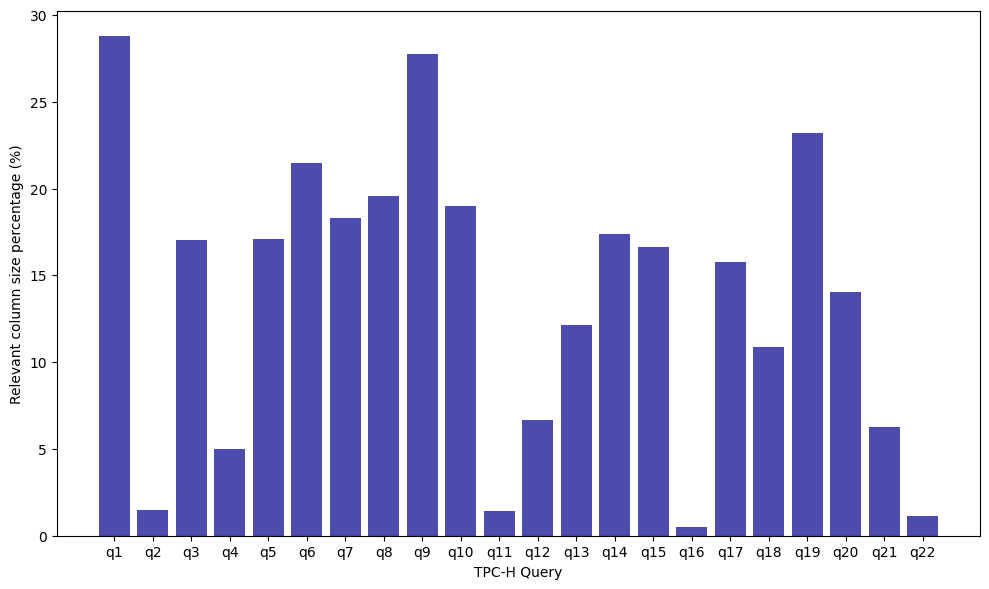

In [2]:
# 设置查询和百分比数据
queries = ['q'+str(i+1) for i in range(22)]
tpch_percentages = [28.79666889140659, 1.4719572708060051, 17.060497468586533, 4.980579900315204, 
               17.069131919348646, 21.48701494883383, 18.31107298447056, 19.57978139770934, 
               27.74155195100289, 18.99012524088393, 1.4297427787479766, 6.673514121622191, 
               12.141786416477302, 17.387274322860545, 16.622115484689825, 0.5004703076969211, 
               15.758696156242818, 10.867216187383075, 23.187125636544454, 14.032681290114388, 
               6.249143740546483, 1.1582253078428504]

# 创建柱状图
plt.figure(figsize=(10,6))
plt.bar(queries, tpch_percentages, color='darkblue', alpha=0.7)

# 设置标题和轴标签
# plt.title('The column size percentage for each query')
plt.xlabel('TPC-H Query')
plt.ylabel('Relevant column size percentage (%)')

# 显示图形
plt.tight_layout()
plt.savefig("./imgs/tpch_column_percentage.png")
plt.show()

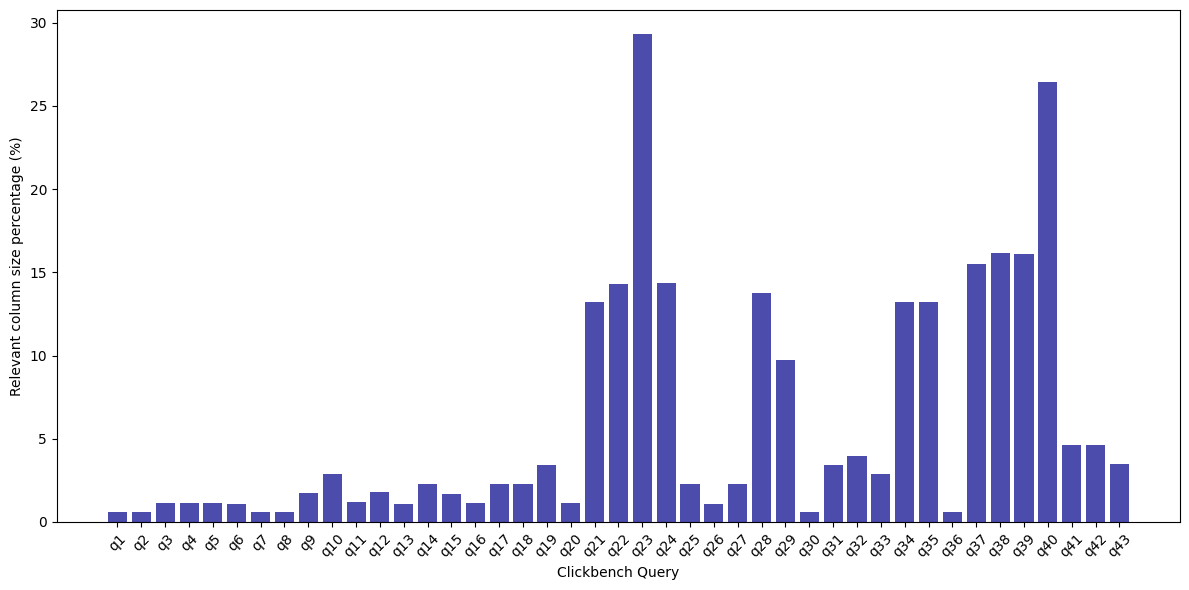

In [3]:
# 设置查询和百分比数据
queries = ['q'+str(i+1) for i in range(43)]
clickbench_percentages = [
    0.5765636422737905, 0.5765636422737905, 1.153127284547581, 1.153000914805662,
    1.153000914805662, 1.1029192752319634, 0.5764372725318714, 0.5765636422737905,
    1.7295645570794524, 2.8826918416270333, 1.2052917896714732, 1.7818554319452637,
    1.1029192752319634, 2.2559201900376253, 1.679482917505754, 1.153000914805662,
    2.2559201900376253, 2.2559201900376253, 3.4087947351013685, 1.153000914805662,
    13.191167313050867, 14.29408658828283, 29.291229255620856, 14.344041858114611,
    2.255793820295706, 1.1029192752319634, 2.255793820295706, 13.767730955324659,
    9.754799244433162, 0.5765636422737905, 3.409173844327125, 3.9856111168589967,
    2.8826918416270333, 13.191167313050867, 13.191167313050867, 0.5765636422737905,
    15.497295512404111, 16.150269951885605, 16.0738591546779, 26.405222041384857,
    4.612130028964566, 4.612256398706486, 3.4590027444169857
]

# 创建柱状图
plt.figure(figsize=(12,6))
plt.bar(queries, clickbench_percentages, color='darkblue', alpha=0.7)

# 设置标题和轴标签
# plt.title('The column size percentage for each query')
plt.xticks(rotation=45)
plt.xlabel('Clickbench Query')
plt.ylabel('Relevant column size percentage (%)')

# 显示图形
plt.tight_layout()
plt.savefig("./imgs/clickbench_column_percentage.png")
plt.show()

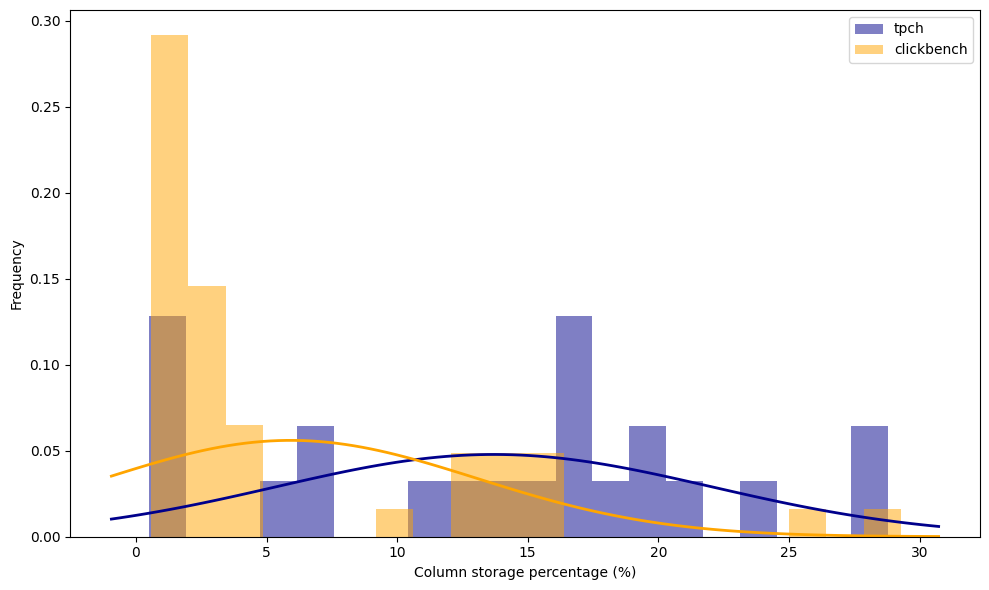

In [4]:
# 获取每个数据集的正态分布参数
mu1, std1 = norm.fit(tpch_percentages)
mu2, std2 = norm.fit(clickbench_percentages)

# 创建一个新的图形
plt.figure(figsize=(10,6))

# 画出每个数据集的存储使用率的直方图和拟合的正态分布曲线
plt.hist(tpch_percentages, bins=20, density=True, alpha=0.5, label='tpch', color='darkblue')
plt.hist(clickbench_percentages, bins=20, density=True, alpha=0.5, label='clickbench', color='orange')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)

plt.plot(x, p1, color='darkblue', linewidth=2)
plt.plot(x, p2, color='orange', linewidth=2)

# 添加图例
plt.legend()

# 添加标题和标签
plt.xlabel('Column storage percentage (%)')
plt.ylabel('Frequency')

# 显示图形
plt.tight_layout()
plt.savefig("./imgs/distribution_column_percentage.png")
plt.show()

# Cost comparison

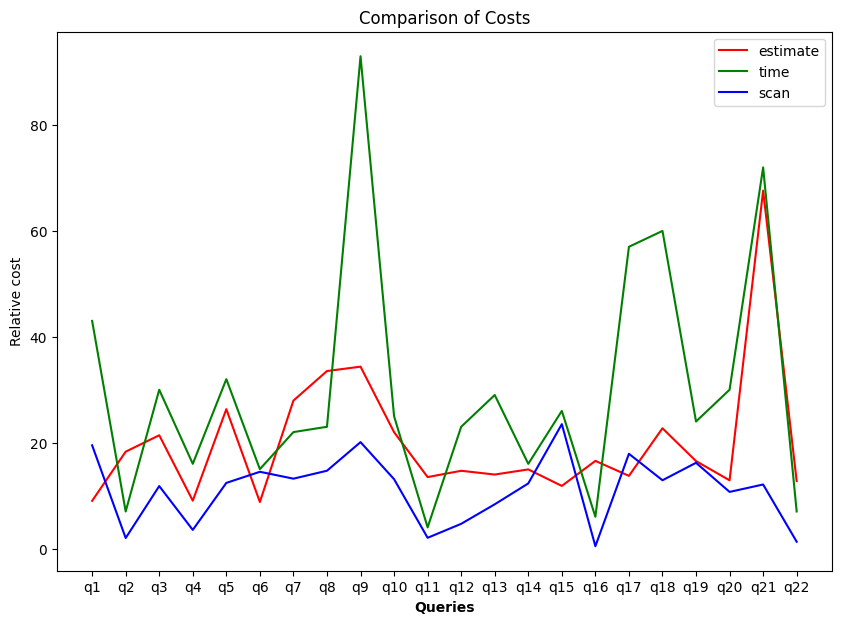

In [9]:
tpch_estimate_path = r"../stats/tpch_cost.json"
tpch_time_path = r"../stats/tpch_time.json"
tpch_scan_path = r"../stats/tpch_scan.json"

with open(tpch_estimate_path) as f:
    estimate_cost = list(json.load(f).values())[0]
with open(tpch_time_path) as f:
    time_cost = list(json.load(f).values())[0]
with open(tpch_scan_path) as f:
    scan_cost = list(json.load(f).values())[0]

plt.figure(figsize=(10,7))

plt.plot(estimate_cost, 'r', label='estimate')  
plt.plot(time_cost, 'g', label='time')  
plt.plot(scan_cost, 'b', label='scan')  

plt.legend()

plt.xlabel('Queries', fontweight='bold')
plt.ylabel('Relative cost')
plt.title('Comparison of Costs')
plt.xticks(range(len(estimate_cost)), ['q'+str(i) for i in range(1, 23)])

plt.show()